## RAMDOM FOREST

### Importing All Libraries

In [6]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

### Loading The Dataset

In [7]:
# Load your dataset (replace "pd_speech_features.csv" with your actual file)
data = pd.read_csv("pd_speech_features.csv")
X = data.drop(columns=['class', 'id'])
y = data['class']

### Applying Scaling

In [8]:
# Scale the input data to the range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Applying Feature Selection

In [9]:
# Feature selection using ANOVA F-value
k = 300
anova_selector = SelectKBest(f_classif, k=k)
X_selected = anova_selector.fit_transform(X_scaled, y)

### Initialising RandomForest Classifier

In [10]:

# Set up k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the classifier (Random Forest in this example)
clf = RandomForestClassifier( n_estimators=100,  # Number of trees in the forest
    criterion='gini',  # Split quality criterion ('gini' or 'entropy')
    max_depth=None,    # Maximum depth of the tree
    min_samples_split=2,  # Minimum samples required to split an internal node
    min_samples_leaf=1,   # Minimum samples required to be at a leaf node
    max_features='sqrt',  # Number of features to consider when looking for the best split
    bootstrap=True,       # Whether to bootstrap samples when building trees
    random_state=42,      # Seed for random number generator
    n_jobs=-1 )

### Applying K-Fold Cross-Validation

Average Accuracy: 0.9086964098989195
Average Precision: 0.9333646554107865
Average Recall: 0.9450063211125158
Average F1 Score: 0.9391020653209988


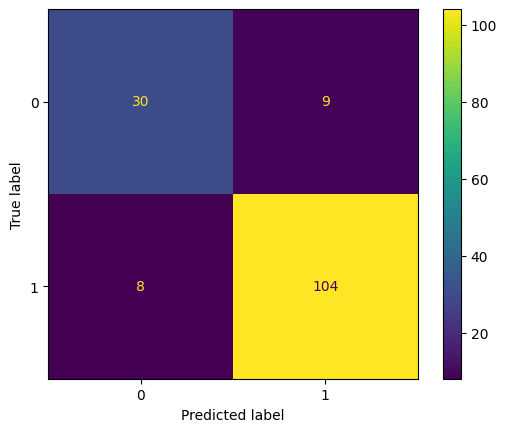

In [12]:

# Perform k-fold cross-validation
accuracies = []
precisions, recalls, f1_scores = [], [], [] 
for train_index, test_index in kf.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply SMOTE only to the training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Train the classifier
    clf.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_preds = clf.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score( y_test, y_preds)    
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)

    # Store metrics
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Print average accuracy across folds
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1 = np.mean(f1_scores)

print("Average Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print(ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_preds))